In [8]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/ASTURCON'23/Adversarial_attacks"
    sys.path.append(data_dir)
else:
    import os
    data_dir = "."

In [5]:
import  tensorflow  as  tf
import  keras

import  matplotlib.pyplot  as  plt
import  numpy  as  np

from  keras  import  backend  as  k
from  keras.applications.inception_v3  import  InceptionV3, decode_predictions


tf.compat.v1.disable_eager_execution ()

2023-10-16 22:00:29.693743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
iv3 = InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.
96112376/96112376 [==============================] - 4s 0us/step


2023-10-16 22:00:52.296660: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-10-16 22:00:52.573969: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-10-16 22:00:53.518296: W tensorflow/c/c_api.cc:300] Operation '{name:'batch_normalization_22/moving_mean/Assign' id:1335 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_22/moving_mean/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_22/moving_mean, batch_normalization_22/moving_mean/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [ ]:
# iv3.summary()

In [9]:
from tensorflow.keras.preprocessing import image

beer = '/beer.jpg'
beerHackImage = '/beerHackImage.png'

kitty = '/kitty.jpg'
kittyhackImage = '/cbx.png'




img = image.img_to_array(image.load_img(data_dir + kittyhackImage, target_size=(299, 299)))
print(img.shape)

(299, 299, 3)




```
# Tiene formato de código
```

- Si se imprime img los resultados van a ser de 0 a 255 los colores pero incepcion funciona de -1 a 1 para lo cual se va a reescalar la imagen

In [10]:
# Conversión de 0-255 a -1-1
img /= 255
img -= 0.5
img *= 2


In [11]:
# El modelo pide que entre un tensor con una dimension mas esa dimension extra es el tamaño del batch (+1 imágen)
img = img.reshape([1, img.shape[0], img.shape[1], img.shape[2]])
print (img.shape)


(1, 299, 299, 3)


In [12]:
# Predicción
y=iv3.predict(img)
decode_predictions(y)

/home/andrade/miniconda3/envs/asturcon/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-10-16 22:01:49.891193: W tensorflow/c/c_api.cc:300] Operation '{name:'predictions/Softmax' id:5621 op device:{requested: '', assigned: ''} def:{{{node predictions/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](predictions/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


35363/35363 [==============================] - 0s 1us/step


[[('n07749582', 'lemon', 0.9967784),
  ('n07747607', 'orange', 0.0018704992),
  ('n04509417', 'unicycle', 0.0010237289),
  ('n03792782', 'mountain_bike', 3.355938e-05),
  ('n03325584', 'feather_boa', 1.4774192e-05)]]



```
# Tiene formato de código
```

## Ataque adversario

In [ ]:
# Vamos a construir un nuevo grapho que permita clasificar las imágenes.
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951 # Limón


loss = out_layer[0, target_class]

grad = k.gradients(loss, inp_layer)[0]

# Que calcule el grafo de gradientes entre el tensor y la funcion de coste #tensor que dice como variar los pixeles
optimize_gradient = k.function([inp_layer, k.learning_phase()], [grad, loss])



In [ ]:

pert=0.01

max_pert=img+pert
min_pert=img-pert

# adv = np.copy(img)


cost = 0.01
adv = np.copy(img)

while cost<0.95:
    gr, cost = optimize_gradient([adv, 0])
    adv += gr

    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    print('Coste de limón: ', cost)

Coste de limón:  2.2693854e-05
Coste de limón:  2.272322e-05
Coste de limón:  2.2763308e-05
Coste de limón:  2.2824026e-05
Coste de limón:  2.2888917e-05
Coste de limón:  2.2955435e-05
Coste de limón:  2.3023447e-05
Coste de limón:  2.3091636e-05
Coste de limón:  2.3159566e-05
Coste de limón:  2.3226778e-05
Coste de limón:  2.3295399e-05
Coste de limón:  2.3365394e-05
Coste de limón:  2.343746e-05
Coste de limón:  2.3511428e-05
Coste de limón:  2.35847e-05
Coste de limón:  2.3658535e-05
Coste de limón:  2.3732866e-05
Coste de limón:  2.3807443e-05
Coste de limón:  2.388185e-05
Coste de limón:  2.3956463e-05
Coste de limón:  2.403143e-05
Coste de limón:  2.4106746e-05
Coste de limón:  2.4183355e-05
Coste de limón:  2.4260553e-05
Coste de limón:  2.4338055e-05
Coste de limón:  2.4416493e-05
Coste de limón:  2.4494138e-05
Coste de limón:  2.4572726e-05
Coste de limón:  2.4651661e-05
Coste de limón:  2.4731187e-05
Coste de limón:  2.4810191e-05
Coste de limón:  2.4888355e-05
Coste de limón

In [ ]:
print(adv.shape)

(1, 299, 299, 3)


In [ ]:
adv /= 2
adv += 0.5
adv *= 255

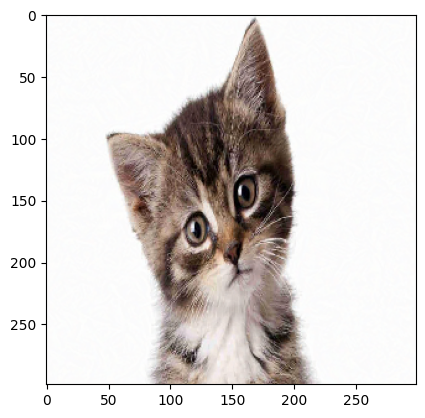

In [ ]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [ ]:
y=iv3.predict(adv)
decode_predictions(y)#pasa de y al resultado

[[('n01924916', 'flatworm', 1.0),
  ('n03950228', 'pitcher', 3.0194795e-13),
  ('n02841315', 'binoculars', 9.640034e-26),
  ('n03047690', 'clog', 5.136842e-26),
  ('n06359193', 'web_site', 4.5216413e-26)]]

In [13]:
from PIL import Image
im=Image.fromarray(adv[0].astype(np.uint8))
im.save(data_dir +"/cbx.png")

NameError: name 'adv' is not defined